# Initial Prewritten Codes and Functions

### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageColor
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from sklearn.cluster import KMeans
import argparse
import imutils
import math 
import io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as pl
from PIL import Image
import numpy as np
import pylab
from colorsys import rgb_to_hsv

### Importing Images and Creating Image Paths and Directories

In [20]:
#Image Paths on my computer
WESE_Path='/Users/rohitganti/Desktop/Research/Luis Research/WSe2/'
Monolayer_Path='/Users/rohitganti/Desktop/Research/Luis Research/WSe2/Potential Monolayers'
Samples_Path='/Users/rohitganti/Desktop/Research/Luis Research/WSe2/Usable Samples'

In [21]:
#Creating the path directories for accessing these images easily for automation
WESE_Array=[]
for items in os.listdir(WESE_Path):
    if items[-4:-1]=='.jp':
        WESE_Array.append(WESE_Path+items)
    
Monolayer_Array=[]
for items in os.listdir(Monolayer_Path):
    Monolayer_Array.append(Monolayer_Path+ items)

Sample_Array=[]
for items in os.listdir(Samples_Path):
    Sample_Array.append(Samples_Path+items)

### Conversion Functions

The following set of functions shall be used for conversions from an array to image or an image to array based on the needs

In [22]:
def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

def fig2data(fig):
    fig.canvas.draw()
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (w,h,4)
    buf = np.roll(buf,3,axis=2)
    return buf

def fig2img2(fig):
    buf = fig2data(fig )
    w, h, d = buf.shape
    return Image.frombytes("RGBA", (w,h), buf.tostring( ) )

### Pixel by Pixel Functions

In [23]:
def count_pixels(filename):
    """
    This function counts all the pixels in the RGB value and returns the color count in an integers format
    and the color tuple in color array
    """
    color_count = {}
    with Image.open(filename) as image:
        width, height = image.size
        rgb_image = image.convert('RGB')
        for x in range(width):
            for y in range(height):
                rgb = rgb_image.getpixel((x, y))
                if rgb in color_count:
                    color_count[rgb] += 1
                else:
                    color_count[rgb] = 1
    color_array=[]
    for colors in color_count:
        color_array.append(colors)
    return color_count, color_array

In [24]:
def get_max(color_dict,color_array):
    """Returns the color value with the most number of pixes or the set background """
    new_max= color_dict[color_array[0]]
    color=color_array[0]
    for colors in color_dict:
        if int(color_dict[colors])> int(new_max):
            new_max= color_dict[colors]
            color= colors
    return color

In [25]:
def average_tuple(nums):
    """Gets an average value for the tuple colors"""
    result = [sum(x) / len(x) for x in zip(*nums)]
    tup_down= (math.floor(result[0]), math.floor(result[1]), math.floor(result[2]))
    tup_up= (math.ceil(result[0]), math.ceil(result[1]), math.ceil(result[2]))
    return tup_down, tup_up

In [26]:
def get_possible_backgrounds(color_dict, color_array):
    """Returns the top five abundant backgrounds in an image"""
    new_dict= color_dict.copy()
    first_back= get_max(new_dict, color_array)
    new_dict.pop(first_back)
    color_array.remove(first_back)
    second_back= get_max(new_dict, color_array)
    new_dict.pop(second_back)
    color_array.remove(second_back)
    third_back= get_max(new_dict, color_array)
    new_dict.pop(third_back)
    color_array.remove(third_back)
    fourth_back= get_max(new_dict,color_array)
    new_dict.pop(fourth_back)
    color_array.remove(fourth_back)
    fifth_back= get_max(new_dict, color_array)
    new_dict.pop(fifth_back)
    color_array.remove(fifth_back)
    all_tuples= first_back, second_back, third_back, fourth_back, fifth_back
    #total_similar_pixels= color_dict[first_back]+color_dict[second_back]+color_dict[third_back]+color_dict[fourth_back]+color_dict[fifth_back]
    return first_back,second_back,third_back,fourth_back,fifth_back

### Layer By Layer Function

The set of the following codes follows on the Heat Map which is generated by this following function:

In [27]:
def generate_heatmap(image_number):
    """
    This function is used to create and save 
    """
    img= Image.open(image_number).convert('L')
    z= np.asarray(img)
    mydata= z[::1,::1]
    fig= pl.figure(facecolor='w')
    ax1= fig.add_subplot(1,2,1)
    im= ax1.imshow(mydata, interpolation='nearest', cmap=pl.cm.jet)
    pl.xticks([])
    pl.yticks([])
    #pl.show()
    b= fig2img(fig)
    c=b.resize(img.size)
    d= c.convert('RGB')
    im= image_number.strip('.jpg')
    string= im+'heatmap.jpg'
    d.save(string)

In [28]:
image_number= WESE_Array[4]
image_number_stripped= image_number.strip('.jpg')

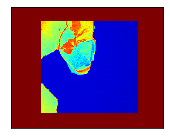

In [29]:
generate_heatmap(image_number_stripped+'heatmap.jpg')

In [30]:
ab=Image.open(image_number_stripped+'heatmap.jpg')

In [31]:
count_pixels(image_number_stripped+'heatmap.jpg')

({(255, 255, 255): 3100461,
  (255, 255, 253): 4506,
  (255, 254, 255): 2732,
  (255, 253, 255): 124,
  (255, 251, 255): 5,
  (255, 252, 255): 36,
  (252, 255, 255): 2607,
  (249, 255, 255): 49,
  (248, 255, 255): 15,
  (247, 255, 255): 21,
  (255, 252, 253): 7,
  (255, 251, 251): 3,
  (255, 250, 251): 1,
  (254, 255, 255): 4981,
  (251, 255, 255): 1016,
  (251, 255, 253): 20,
  (252, 255, 251): 38,
  (254, 255, 251): 488,
  (254, 255, 250): 385,
  (255, 255, 250): 878,
  (252, 255, 253): 133,
  (254, 255, 253): 578,
  (255, 255, 251): 836,
  (255, 254, 253): 823,
  (255, 253, 253): 376,
  (255, 254, 251): 1793,
  (255, 255, 248): 186,
  (255, 255, 246): 44,
  (255, 254, 248): 262,
  (255, 254, 246): 2,
  (255, 253, 244): 307,
  (255, 254, 243): 255,
  (255, 253, 250): 128,
  (255, 253, 246): 31,
  (255, 254, 250): 114,
  (254, 254, 255): 48,
  (255, 252, 250): 11,
  (255, 252, 248): 3,
  (249, 249, 247): 1,
  (250, 251, 246): 2,
  (243, 244, 238): 1,
  (253, 252, 255): 22,
  (252, 251

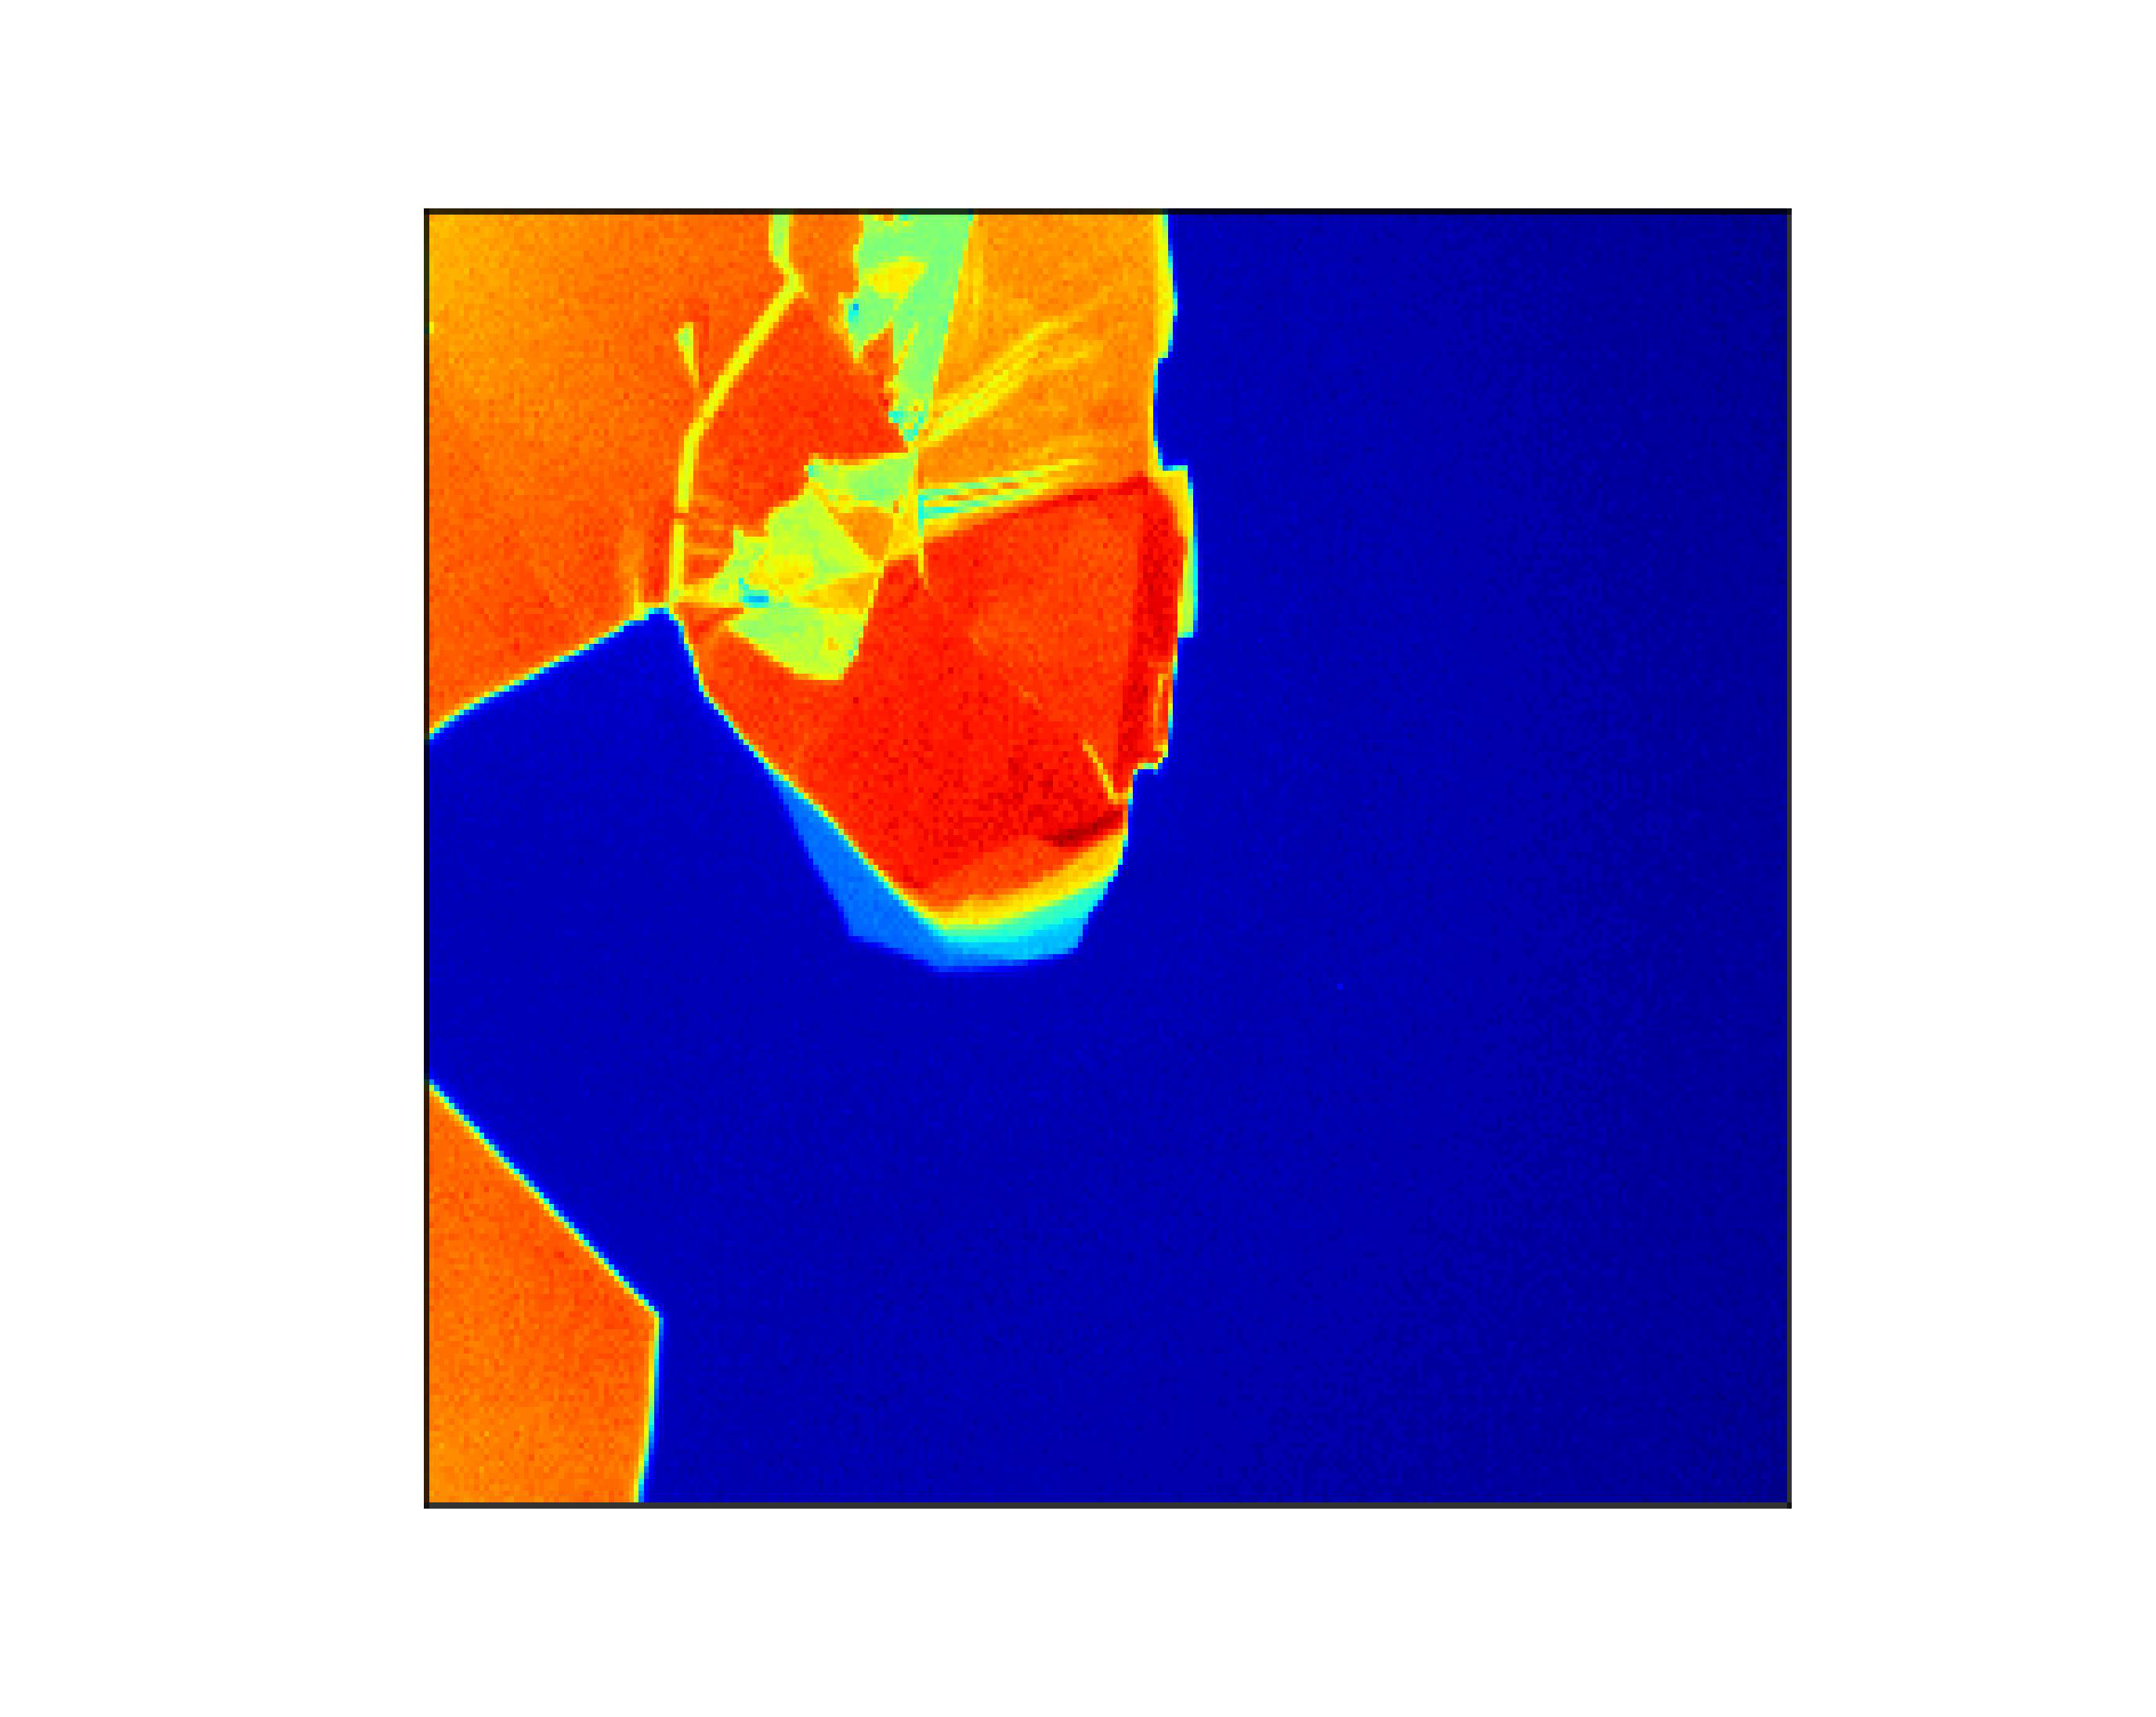

In [44]:
ab

## Piece Information Statistics

In [33]:
def get_number_of_pieces(image_number):
    image= cv2.imread(sobely(image_number))
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges= cv2.Canny(gray,threshold1=300, threshold2=500)
    contours, hierarchy= cv2.findContours(edges.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return len(contours)

In [34]:
def generate_pieces(image_number):
    image= cv2.imread(sobely(image_number))
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges= cv2.Canny(gray,threshold1=300, threshold2=500)
    contours, hierarchy= cv2.findContours(edges.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    pieces_data={
        "Piece_Number":[],
        "Area":[],
        "Perimeter":[],
        "Epsilon":[],
        "Approximation":[],
        "Convexity":[]
    }
    count=1
    for i in contours:
        pieces_data["Piece_Number"].append(count)
        pieces_data["Area"].append(cv2.contourArea(i))
        pieces_data["Perimeter"].append(cv2.arcLength(i,True))
        pieces_data["Epsilon"].append(0.1*cv2.arcLength(i,True))
        pieces_data["Approximation"].append(cv2.approxPolyDP(i,0.1*cv2.arcLength(i,True),True))
        pieces_data["Convexity"].append(cv2.isContourConvex(i))
        count=count+1
    material_data=pd.DataFrame(pieces_data)
    return material_data

In [35]:
def filter_pieces_by_convexity(material_data):
    material_data1= material_data.loc[material_data['Area']!=0.0]
    material_data2= material_data1.loc[material_data1['Convexity']==True]
    return material_data2

In [36]:
def filter_pieces_by_concavity(material_data):
    material_data1= material_data.loc[material_data['Area']!=0.0]
    material_data2= material_data1.loc[material_data1['Convexity']!=True]
    return material_data2

In [51]:
def sobely(image_number):
    imag= cv2.imread(image_number,cv2.IMREAD_COLOR)
    b,g,r= cv2.split(imag)
    image=cv2.merge([r,g,b])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    plt.title('SobelY')
    #plt.xticks([])
    #plt.yticks([])
    string= image_number+'_SobelY.jpg'
    plt.imshow(sobely, cmap='gray')
    plt.imshow(sobely)
    plt.savefig(string)
    return string

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


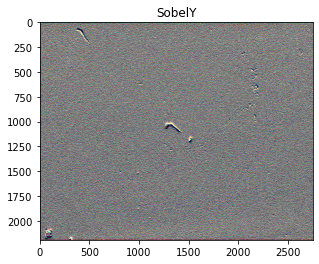

In [67]:
a= generate_pieces(WESE_Array[2])

In [79]:
len(a.count(axis= "columns"))

65

In [81]:
emp=[]
for i in range(len(WESE_Array)):
    a= filter_pieces_by_convexity(generate_pieces(WESE_Array[i]))
    if len(a.count(axis='columns'))>0:
        emp.append(WESE_Array[i])
print(emp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcb2202b700> (for post_execute):


KeyboardInterrupt: 

In [82]:
emp

['/Users/rohitganti/Desktop/Research/Luis Research/WSe2/A54_10x.jpg',
 '/Users/rohitganti/Desktop/Research/Luis Research/WSe2/A111_20x.jpg',
 '/Users/rohitganti/Desktop/Research/Luis Research/WSe2/A34_100x.jpg',
 '/Users/rohitganti/Desktop/Research/Luis Research/WSe2/A131_10x.jpg']

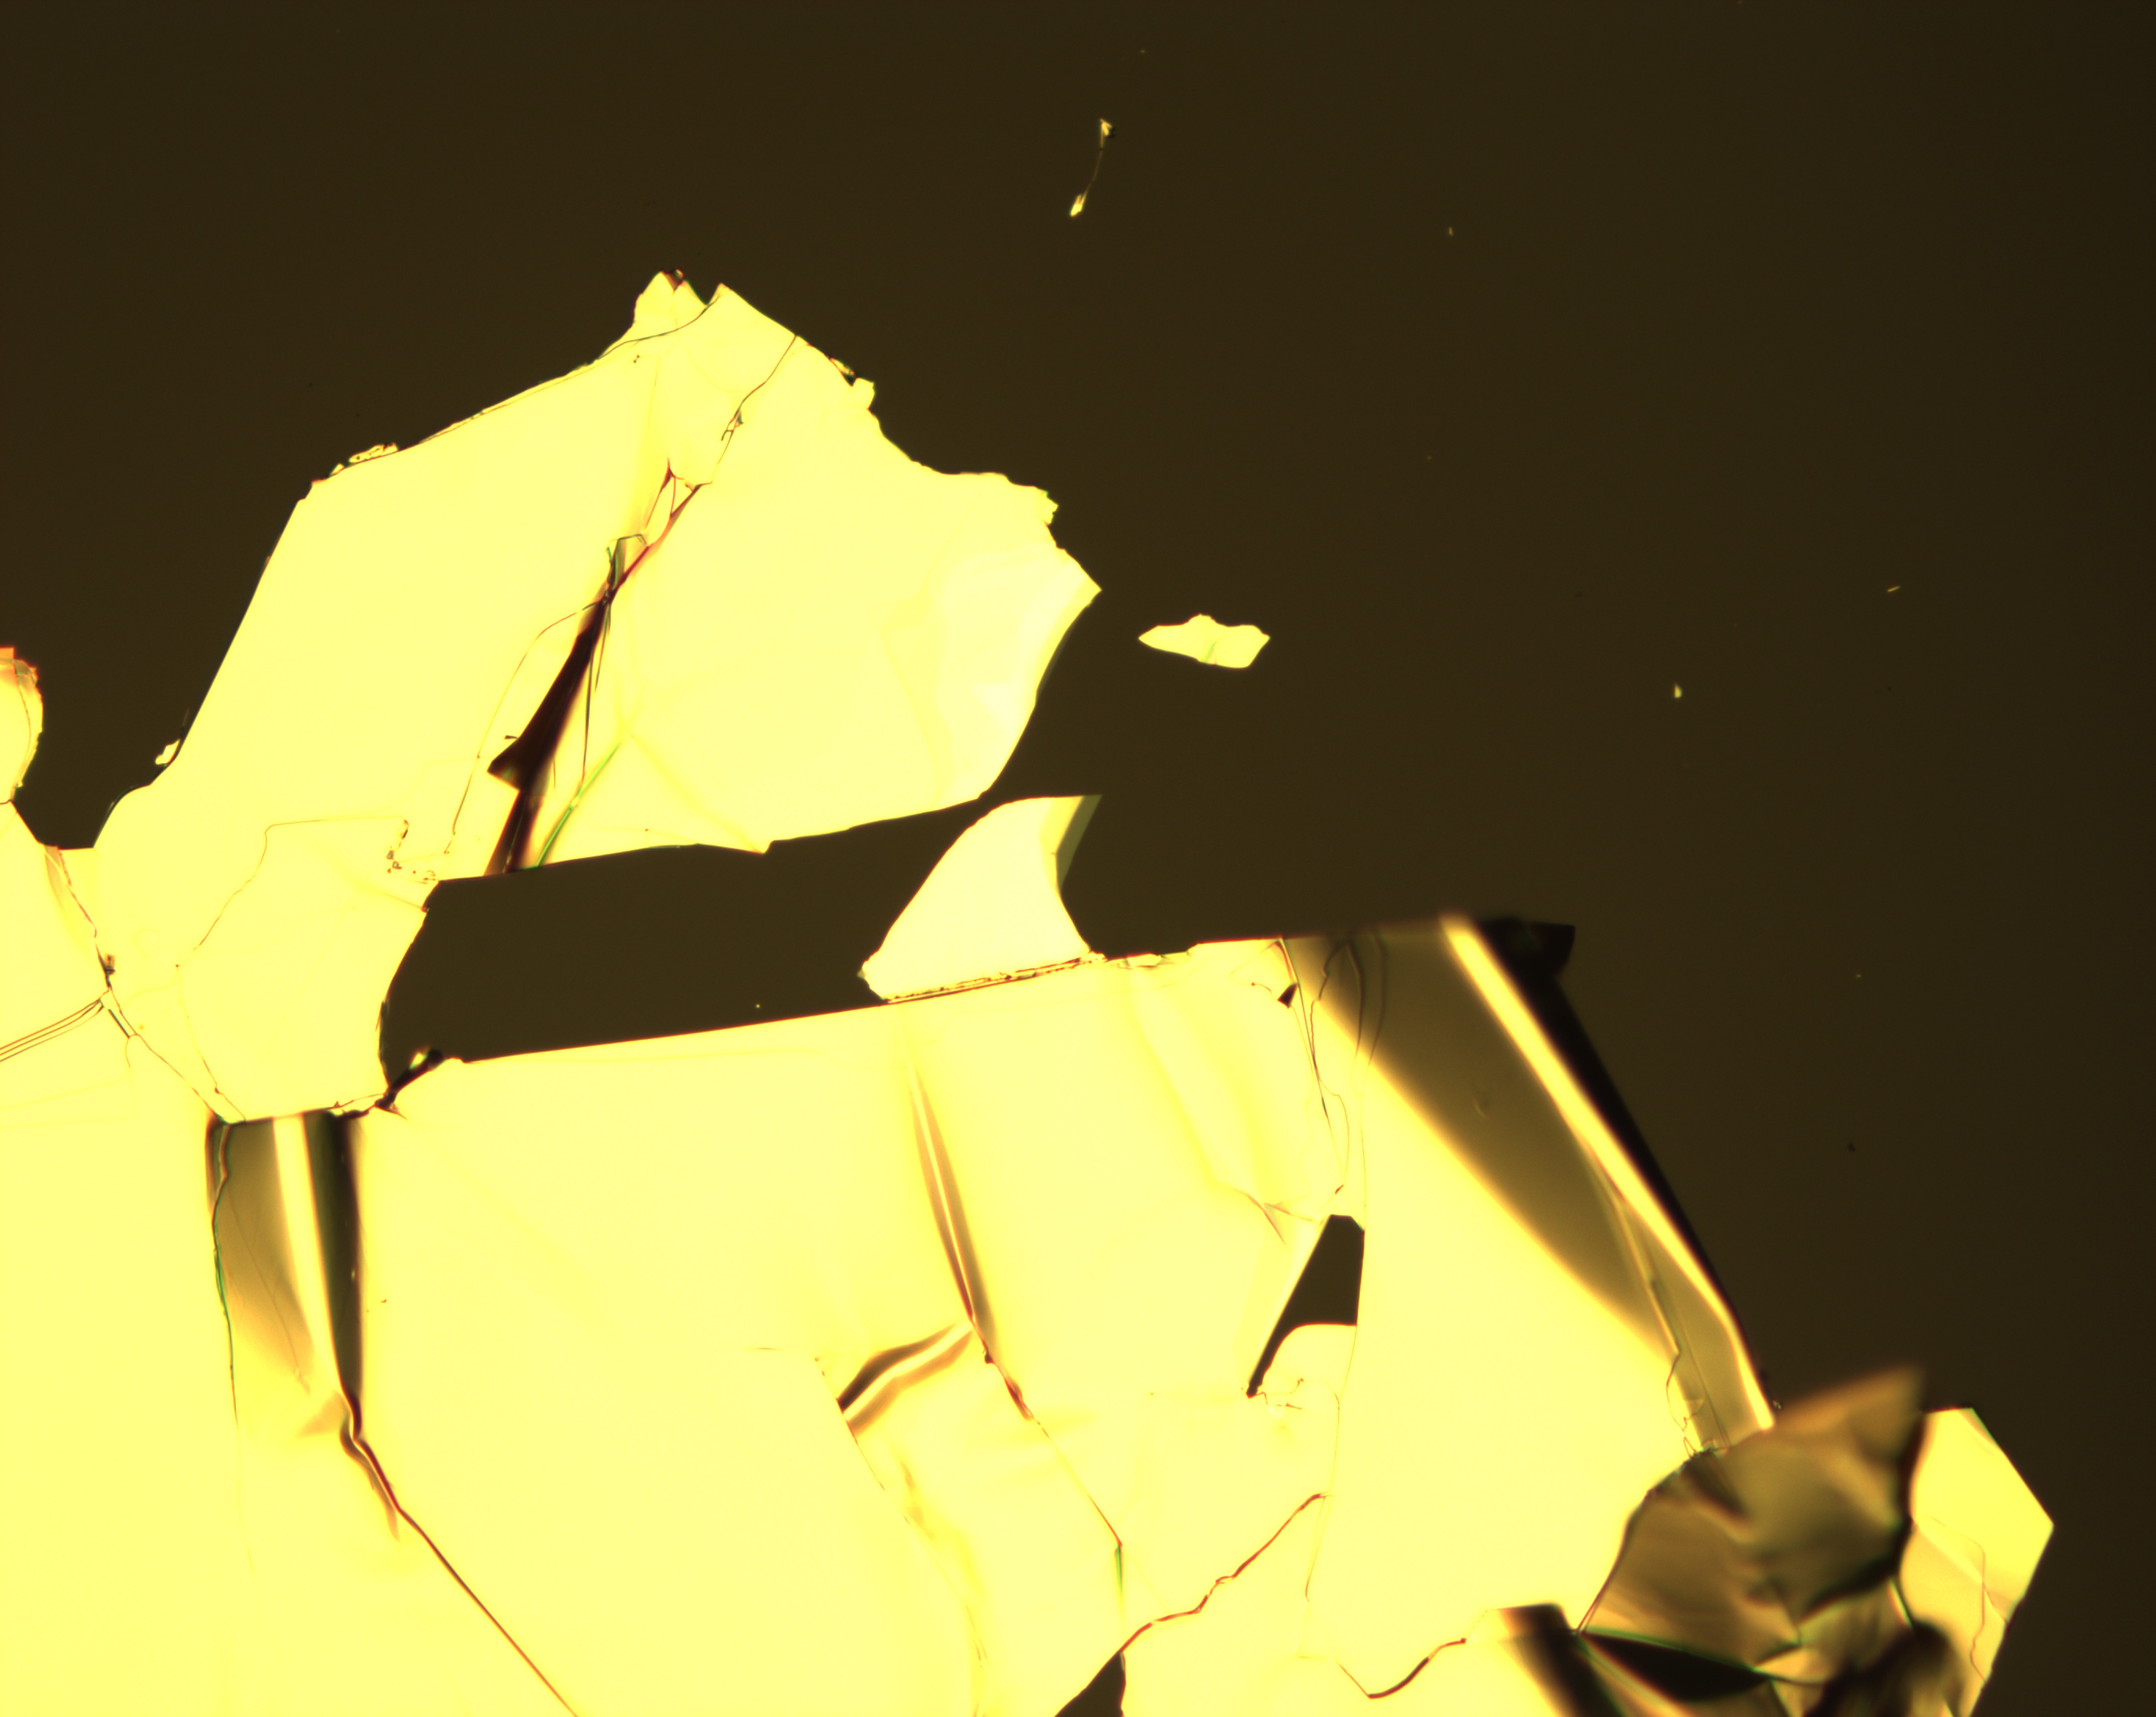

In [83]:
Image.open(emp[1])